Global Variables

In [29]:
# ANSI escape codes for colored output
GREEN = "\033[92m"
BLUE = "\033[94m"
YELLOW = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"  # White

### **Qu'est-ce qu'un CNN ?**

Un réseau de neurones convolutionnel est un type de réseau de neurones profond spécifiquement conçu pour traiter des données ayant une structure en grille, comme les images. Les CNN sont particulièrement efficaces pour les tâches de vision par ordinateur telles que la classification d'images, la détection d'objets et la reconnaissance de visages.

---

### **Principaux composants d'un CNN**

1. **Couche de convolution**
   - **Filtres (ou noyaux)** : petits matrices de poids appliquées sur l'entrée.
   - **Opération de convolution** : consiste à faire glisser le filtre sur l'entrée pour produire une carte de caractéristiques (feature map).
   - **Fonction d'activation** : généralement la ReLU (Rectified Linear Unit), qui introduit la non-linéarité.

2. **Couche de pooling**
   - **But** : réduire la dimensionnalité spatiale des cartes de caractéristiques tout en conservant les informations importantes.
   - **Types courants** : max-pooling (prend la valeur maximale), average-pooling (calcule la moyenne).

3. **Couches entièrement connectées**
   - **Fonction** : chaque neurone est connecté à tous les neurones de la couche précédente.
   - **Utilisation** : généralement utilisées à la fin du réseau pour effectuer la classification.

---

### **Comment fonctionne un CNN ?**

1. **Extraction de caractéristiques locales**
   - Les couches de convolution détectent des motifs simples (bords, textures) dans les premières couches.
   - Les couches plus profondes détectent des motifs plus complexes (formes, objets entiers).

2. **Réduction de la dimensionnalité**
   - Les couches de pooling diminuent la taille des cartes de caractéristiques, ce qui réduit le nombre de paramètres et contrôle le surapprentissage.

3. **Classification**
   - Les couches entièrement connectées utilisent les caractéristiques extraites pour prédire la classe de l'entrée.

---

### **Pourquoi les CNN sont efficaces pour les images ?**

- **Partage des poids** : les mêmes filtres sont utilisés sur toute l'image, ce qui réduit le nombre de paramètres.
- **Invariance aux translations** : la capacité à reconnaître des motifs indépendamment de leur position dans l'image.
- **Hiérarchisation des caractéristiques** : les CNN apprennent des caractéristiques de bas niveau à haut niveau.

---

### **Exemple simplifié**

- **Entrée** : une image de 28x28 pixels (par exemple, un chiffre manuscrit).
- **Couche de convolution** : application de plusieurs filtres pour extraire des caractéristiques.
- **Fonction d'activation ReLU** : introduction de la non-linéarité.
- **Couche de pooling** : réduction de la dimension spatiale.
- **Couches entièrement connectées** : classification de l'image en une des classes possibles (par exemple, les chiffres de 0 à 9).

---

### **Apprentissage des poids**

- **Propagation avant** : calcul des sorties du réseau pour une entrée donnée.
- **Fonction de perte** : mesure l'écart entre la sortie prédite et la sortie réelle.
- **Rétropropagation** : ajustement des poids pour minimiser la fonction de perte en utilisant des algorithmes d'optimisation comme la descente de gradient.

---

### **Ressources pour approfondir**

- **Cours en ligne** : consultez des plateformes comme Coursera ou Udemy pour des cours sur les CNN.
- **Livres** : "Deep Learning" par Ian Goodfellow, Yoshua Bengio et Aaron Courville.
- **Tutoriels pratiques** : expérimentez avec des bibliothèques comme TensorFlow ou PyTorch pour implémenter vos propres CNN.

---

N'hésitez pas à poser des questions plus spécifiques ou à demander des clarifications sur certains points !

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


Pour l’importation des bibliothèques et le chargement des données, les étapes sont similaires à celles d’un réseau de neurones classique.

---

## Importation des Bibliothèques Nécessaires

Pour construire et entraîner un CNN en utilisant TensorFlow et Keras, nous devons d’abord importer les bibliothèques de base. Dans ce tutoriel, nous utiliserons TensorFlow, Numpy pour les manipulations de données, et Matplotlib pour visualiser les images si nécessaire.

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
```

---

## Chargement et prétraitement des Données

Pour ce notebook, nous utiliserons le jeu de données **MNIST**.

### Exemple 1 : Jeu de Données MNIST (Chiffres manuscrits)

MNIST est un jeu de données de chiffres manuscrits (de 0 à 9) en niveaux de gris de taille 28x28 pixels.

```python
# Charger le jeu de données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normaliser les images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Ajouter une dimension pour le canal (gris) pour que les données soient compatibles avec les couches Conv2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Encoder les étiquettes en catégories (One-Hot Encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

#### Explications

- **Normalisation** : Les valeurs des pixels sont divisées par 255 pour les mettre dans une plage entre 0 et 1, ce qui rend l'entraînement plus stable.
- **Ajout d'une dimension** : Les images MNIST sont en niveaux de gris (28x28), donc on ajoute une dimension supplémentaire pour les rendre compatibles avec les couches `Conv2D` de TensorFlow (forme finale : 28x28x1).
- **Encodage des étiquettes** : Utilisation de `to_categorical` pour convertir les labels en vecteurs binaires (One-Hot Encoding), car il y a 10 classes pour les chiffres (0-9).

### Exemple 2 : Jeu de Données CIFAR-10 (Images couleur de 10 classes)

CIFAR-10 est un jeu de données plus complexe contenant des images couleur (32x32) de 10 classes différentes (par exemple, chiens, chats, avions, etc.).

```python
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Encoder les étiquettes en catégories (One-Hot Encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

#### Explications

- **Normalisation** : Comme pour MNIST, les valeurs de pixels sont divisées par 255 pour les normaliser entre 0 et 1.
- **Pas besoin d’ajouter une dimension** : CIFAR-10 contient déjà des images avec trois canaux de couleur (RGB), donc pas besoin d'ajouter une dimension supplémentaire.
- **Encodage des étiquettes** : Conversion des labels en vecteurs binaires pour avoir une sortie de 10 dimensions pour les 10 classes.

---

## Visualisation des Images (Optionnel)

Pour vérifier le bon chargement des données, vous pouvez visualiser quelques images du jeu de données en utilisant `matplotlib`.

```python
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap="gray" if x_train.shape[-1] == 1 else None)
    plt.title(f"Étiquette : {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()
```

Cette section est optionnelle mais peut être utile pour vérifier que les données sont correctement chargées et prétraitées.

---

## Résumé

1. **Importation des Bibliothèques** : Importation de TensorFlow, Keras, NumPy, et Matplotlib.
2. **Chargement des Données** : Utilisation des datasets MNIST ou CIFAR-10 pour l'entraînement.
3. **Prétraitement** : Normalisation des images, ajustement de la forme pour les couches convolutives, et encodage des étiquettes.
4. **Visualisation (optionnelle)** : Vérification visuelle des images pour valider le chargement des données.

Avec ces étapes, vous avez maintenant toutes les données prêtes pour être utilisées dans le CNN, qu'il s'agisse d'un réseau simple ou convolutif.

In [31]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

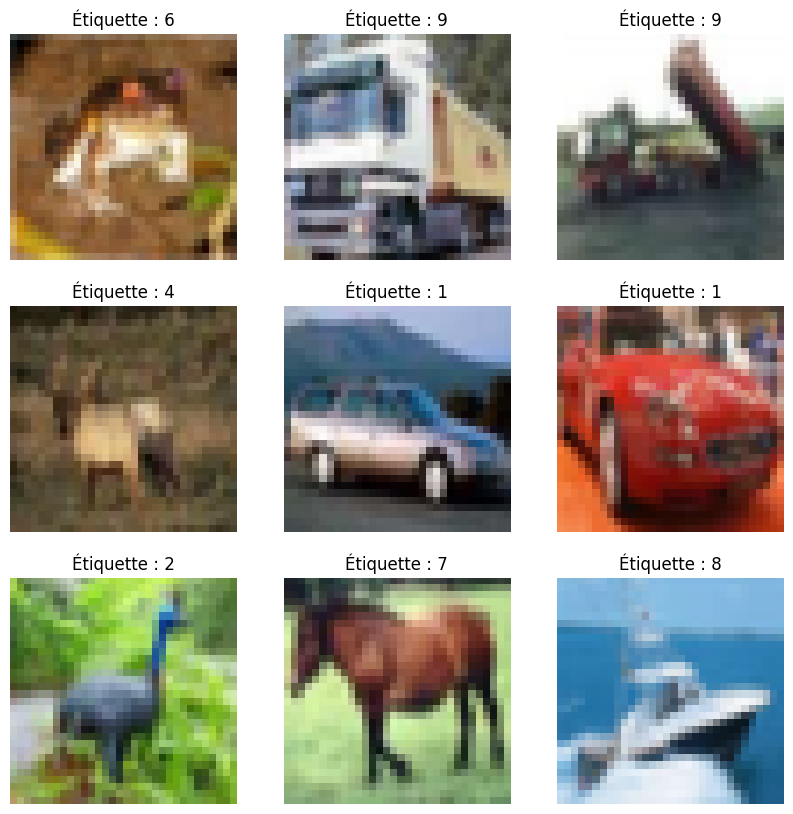

In [32]:
# Normaliser les images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Encoder les étiquettes en catégories (One-Hot Encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap="gray" if x_train.shape[-1] == 1 else None)
    plt.title(f"Étiquette : {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

Expliquons la construction de ce modèle CNN étape par étape. Ce modèle est conçu pour traiter des images en niveaux de gris de taille 28x28 pixels et les classer en différentes catégories (par exemple, des chiffres de 0 à 9 dans le cas de MNIST).

### Code Complet

```python
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    #layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
```

### Étapes de la Construction

#### 1. `keras.Input(shape=(28, 28, 1))`
- **Définition de la forme d'entrée** : Ici, nous spécifions que le modèle prend en entrée des images de taille 28x28 pixels avec 1 canal (images en niveaux de gris).
- **Objectif** : Cette couche d'entrée fixe la forme des données en entrée et est particulièrement utile dans les modèles `Sequential`.

#### 2. `layers.Conv2D(32, kernel_size=(3, 3), activation='relu')`
- **Couche Convolutive** : Cette couche applique 32 filtres de convolution de taille 3x3 sur l'image d'entrée.
- **Activation ReLU** : `ReLU` (Rectified Linear Unit) est appliqué pour ajouter de la non-linéarité et accélérer l'entraînement.
- **Objectif** : La couche convolutive aide à extraire des caractéristiques locales de l'image, telles que des bords ou des textures, en utilisant les filtres pour détecter différentes parties de l'image.

#### 3. `layers.MaxPooling2D(pool_size=(2, 2))`
- **Couche de Max Pooling** : Cette couche réduit la taille de l'image en prenant le maximum dans chaque région 2x2.
- **Objectif** : Le pooling réduit la dimension de la carte de caractéristiques tout en conservant les informations les plus importantes. Cela permet de réduire le nombre de paramètres et de contrôler le surapprentissage.

#### 4. `layers.Conv2D(64, kernel_size=(3, 3), activation='relu')`
- **Deuxième Couche Convolutive** : Cette couche applique 64 filtres de convolution 3x3 sur la sortie de la première couche de pooling.
- **Activation ReLU** : Encore une fois, `ReLU` est appliqué pour introduire de la non-linéarité.
- **Objectif** : Cette deuxième couche convolutive permet d'extraire des caractéristiques plus complexes et abstraites de l'image.

#### 5. `layers.MaxPooling2D(pool_size=(2, 2))`
- **Deuxième Couche de Max Pooling** : Comme précédemment, cette couche réduit la taille de la carte de caractéristiques en appliquant un pooling 2x2.
- **Objectif** : Réduire davantage la dimension de la carte de caractéristiques pour diminuer le nombre de paramètres du modèle, tout en conservant les caractéristiques les plus importantes.

#### 6. `layers.Flatten()`
- **Aplatissement des Données** : Cette couche transforme la carte de caractéristiques multidimensionnelle en un vecteur unidimensionnel.
- **Objectif** : Cette étape est nécessaire pour passer des couches convolutives (2D) aux couches entièrement connectées (1D), qui attendent des vecteurs en entrée.

#### 7. `#layers.Dropout(0.5)`
- **(Optionnel) Couche Dropout** : Commentée dans ce code, cette couche est utilisée pour éviter le surapprentissage en désactivant aléatoirement 50% des neurones pendant l'entraînement.
- **Objectif** : Dropout est une technique de régularisation qui aide à généraliser le modèle en le rendant moins dépendant de certaines caractéristiques spécifiques.

#### 8. `layers.Dense(128, activation='relu')`
- **Couche Dense (Entièrement Connectée)** : Cette couche contient 128 neurones connectés à tous les neurones de la couche précédente.
- **Activation ReLU** : ReLU est appliqué ici pour introduire de la non-linéarité.
- **Objectif** : Combiner les caractéristiques extraites par les couches convolutives pour former des représentations plus complexes.

#### 9. `layers.Dense(num_classes, activation='softmax')`
- **Couche de Sortie** : Cette couche entièrement connectée finale a un nombre de neurones égal au nombre de classes (`num_classes`), avec une fonction d'activation **softmax**.
- **Activation Softmax** : Softmax normalise les sorties pour représenter des probabilités pour chaque classe.
- **Objectif** : Fournir les prédictions de probabilité pour chaque classe. La classe ayant la probabilité la plus élevée sera choisie comme prédiction du modèle.

### Résumé

- **Partie Convolutive** : Les deux premières couches `Conv2D` et `MaxPooling2D` sont utilisées pour extraire des caractéristiques importantes de l'image d'entrée. La première couche convolutive détecte des caractéristiques simples (par exemple, des bords), et la seconde couche convolutive détecte des caractéristiques plus complexes (par exemple, des motifs).
- **Partie Aplatissement et Dense** : Après avoir extrait les caractéristiques, elles sont aplaties en un vecteur et passées à des couches entièrement connectées, qui combinent les informations pour faire une prédiction.
- **Sortie Softmax** : Fournit des probabilités pour chaque classe cible.

Ce modèle CNN est simple mais suffisant pour des tâches de classification d'images comme MNIST ou CIFAR-10. Il est efficace pour capturer les caractéristiques importantes de l'image, les combiner et effectuer une classification en utilisant la dernière couche dense.

In [33]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

La compilation d'un modèle dans Keras consiste à définir les configurations nécessaires à son entraînement, notamment en spécifiant l'optimiseur, la fonction de perte et les métriques d'évaluation. Voyons en détail les paramètres utilisés dans la fonction `compile` de Keras, avec des explications sur les choix possibles pour chaque paramètre, et quand les utiliser ou non.

### Exemple de Code de Compilation

```python
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

### Paramètres de `compile`

1. **`optimizer` (Optimiseur)**  
   L’optimiseur contrôle le processus d’apprentissage du modèle en ajustant les poids du réseau pour minimiser la fonction de perte. Voici quelques optimiseurs populaires et des recommandations pour leur utilisation :

   - **`sgd` (Stochastic Gradient Descent)** : L’optimiseur de descente de gradient stochastique classique. Il est simple et peut être efficace pour des petits datasets ou des modèles de petite taille.
     - **Pratique** : Lorsque le modèle est simple et que la vitesse d'apprentissage doit être maîtrisée (modèles peu profonds).
     - **Moins Pratique** : Pour des modèles profonds et des datasets complexes, car il peut être lent et avoir des difficultés à sortir des minima locaux.

   - **`adam` (Adaptive Moment Estimation)** : L’un des optimiseurs les plus populaires, car il combine les avantages de `RMSprop` et `Momentum`. Il adapte automatiquement le taux d'apprentissage.
     - **Pratique** : Convient aux modèles profonds et pour la plupart des tâches de deep learning. Il est généralement un bon choix par défaut pour de nombreux modèles.
     - **Moins Pratique** : Peut surapprendre rapidement si le taux d'apprentissage n’est pas bien ajusté, notamment sur des datasets de petite taille.

   - **`rmsprop`** : Un optimiseur adapté aux réseaux de neurones récurrents et aux données séquentielles.
     - **Pratique** : Très efficace pour les RNN et LSTM. Bon pour des données séquentielles ou de séries temporelles.
     - **Moins Pratique** : Moins efficace pour des modèles de vision par ordinateur par rapport à `adam`.

   - **`adagrad`** : Un optimiseur avec un taux d’apprentissage adaptatif, utile pour des problèmes de sparsité.
     - **Pratique** : Pour les modèles travaillant avec des données très creuses (ex. traitement de texte).
     - **Moins Pratique** : Le taux d'apprentissage peut diminuer trop rapidement, rendant l'entraînement moins efficace pour des modèles profonds.

   > **Remarque** : L'optimiseur `adam` est souvent un bon choix par défaut pour les modèles CNN, car il est rapide et fonctionne bien dans la plupart des situations.

2. **`loss` (Fonction de Perte)**  
   La fonction de perte mesure l'erreur entre les prédictions du modèle et les valeurs réelles. Elle guide l'optimiseur pour ajuster les poids du modèle. Le choix de la fonction de perte dépend du type de tâche :

   - **`categorical_crossentropy`** : Utilisée pour les problèmes de classification multi-classes avec des étiquettes encodées en one-hot (comme les images de chiffres 0-9 dans MNIST).
     - **Pratique** : Lorsque les labels sont dans une forme one-hot et qu'il y a plus de deux classes.
     - **Moins Pratique** : Non adaptée pour les problèmes de classification binaire ou lorsque les labels ne sont pas one-hot.

   - **`binary_crossentropy`** : Utilisée pour la classification binaire (deux classes).
     - **Pratique** : Pour les problèmes de classification binaire, où chaque exemple appartient à l'une des deux classes.
     - **Moins Pratique** : Pour les classifications multi-classes ou les régressions.

   - **`sparse_categorical_crossentropy`** : Semblable à `categorical_crossentropy`, mais utilisée lorsque les étiquettes ne sont pas encodées en one-hot.
     - **Pratique** : Pour les problèmes de classification multi-classes où les labels sont des entiers.
     - **Moins Pratique** : Inutile si les étiquettes sont déjà en one-hot (dans ce cas, utilisez `categorical_crossentropy`).

   - **`mean_squared_error` (MSE)** : Couramment utilisée pour les tâches de régression, elle mesure la moyenne des erreurs au carré.
     - **Pratique** : Pour les problèmes de régression, où l’objectif est de minimiser la différence entre les valeurs prédites et réelles.
     - **Moins Pratique** : Pas adaptée pour les tâches de classification, car elle ne prend pas en compte la probabilité.

   > **Remarque** : Pour un CNN de classification multi-classes, comme celui-ci, `categorical_crossentropy` est approprié si les labels sont encodés en one-hot. Si vos labels sont des entiers, `sparse_categorical_crossentropy` serait plus adapté.

3. **`metrics` (Métriques)**  
   Les métriques fournissent une évaluation supplémentaire pour suivre les performances du modèle lors de l’entraînement et de l’évaluation. La métrique couramment utilisée pour les modèles de classification est `accuracy`.

   - **`accuracy`** : Représente la proportion de prédictions correctes.
     - **Pratique** : Pour la plupart des problèmes de classification, `accuracy` donne une bonne indication de la performance.
     - **Moins Pratique** : Pour les problèmes de classification déséquilibrés (où une classe est beaucoup plus fréquente), `accuracy` peut être trompeuse. Dans ces cas, des métriques comme la **précision** (precision), le **rappel** (recall) ou le **F1-score** sont plus pertinentes.

   - **`precision` et `recall`** : La précision mesure la proportion de vraies prédictions positives parmi toutes les prédictions positives, tandis que le rappel mesure la proportion de vraies prédictions positives parmi toutes les vraies positives.
     - **Pratique** : Utile pour les ensembles de données déséquilibrés ou les applications où les faux positifs ou faux négatifs ont des conséquences importantes.
     - **Moins Pratique** : Pas nécessaire pour des ensembles de données équilibrés ou des problèmes où l’accuracy suffit pour évaluer les performances.

   - **`AUC` (Area Under the Curve)** : Utile pour évaluer les modèles de classification binaire. Il mesure la capacité du modèle à différencier entre les classes positives et négatives.
     - **Pratique** : Pour les problèmes de classification binaire avec des données déséquilibrées.
     - **Moins Pratique** : Non pertinent pour les problèmes de classification multi-classes.

   > **Remarque** : Pour un problème de classification multi-classes, `accuracy` est généralement la métrique par défaut. Si les données sont déséquilibrées, vous pourriez envisager d'ajouter des métriques supplémentaires comme `precision`, `recall` ou `F1-score` pour des évaluations plus nuancées.

---

### Exemple de Configuration Avancée

Si vous travaillez sur un problème de classification multi-classes avec des étiquettes sous forme d'entiers (non one-hot) et que vous souhaitez surveiller la précision et le rappel, voici comment vous pourriez configurer la compilation :

```python
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Taux d'apprentissage ajusté
    loss='sparse_categorical_crossentropy',                   # Pour des étiquettes entières
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
```

- **`tf.keras.optimizers.Adam(learning_rate=0.001)`** : Ici, nous ajustons le taux d'apprentissage de `Adam` à 0.001, ce qui peut être utile pour éviter un surapprentissage.
- **`sparse_categorical_crossentropy`** : Utilisée si les labels sont des entiers (non one-hot).
- **`metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]`** : En plus de la précision globale, nous ajoutons les métriques `Precision` et `Recall` pour avoir une idée plus complète des performances.

---

En résumé, la configuration de la compilation dépend fortement du type de tâche (classification binaire, multi-classes, régression) et de la nature des données. Adapter correctement ces paramètres garantit que le modèle apprendra de manière optimale et que les métriques utilisées seront pertinentes pour évaluer les performances réelles du modèle.

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

L'entraînement d'un modèle dans Keras consiste à exécuter le processus d'apprentissage sur un ensemble de données en utilisant la fonction `fit`. Lors de l'entraînement, le modèle ajuste ses poids pour minimiser la fonction de perte spécifiée lors de la compilation. Cette section explique comment utiliser la fonction `fit` avec différents paramètres pour entraîner le modèle, et quelles options sont disponibles pour optimiser l'apprentissage.

### Exemple de Code d'Entraînement

```python
history = model.fit(
    x_train,              # Données d'entraînement
    y_train,              # Labels d'entraînement
    batch_size=128,       # Taille du batch
    epochs=10,            # Nombre d'epochs
    validation_split=0.1, # Fraction de validation
    callbacks=[early_stopping]  # Callbacks (optionnel)
)
```

### Paramètres de `fit`

1. **`x` (ou `x_train`) et `y` (ou `y_train`)**
   - **Description** : Ce sont les données d'entrée et leurs labels respectifs.
   - **Utilisation** : 
     - **x_train** : contient les images ou données d'entraînement.
     - **y_train** : contient les labels ou classes des données d'entraînement.
   - **Format** : `x_train` doit être sous forme de tableau (ou tenseur) de taille `(nombre_d'échantillons, hauteur, largeur, canaux)`, par exemple `(60000, 28, 28, 1)` pour MNIST. `y_train` est typiquement un tableau d'étiquettes correspondant.

2. **`batch_size`**
   - **Description** : Nombre d'échantillons traités avant que le modèle ne mette à jour ses poids.
   - **Pratique** : La taille de batch influe sur la vitesse d’entraînement et la stabilité de la convergence.
   - **Recommandations** :
     - **Petites tailles de batch** (ex. 16, 32) : Souvent utilisées lorsque les données sont limitées ou pour capturer des petites variations dans les gradients. Cela peut ralentir l’entraînement, mais aussi réduire les oscillations dans la descente de gradient.
     - **Grandes tailles de batch** (ex. 128, 256) : Utiles pour des grandes quantités de données. Cela accélère l’entraînement mais peut consommer beaucoup de mémoire et réduire la capacité de généralisation du modèle.
   - **Exemple** : Dans cet exemple, nous avons choisi `batch_size=128`, ce qui est un bon compromis entre vitesse et précision pour des images de taille modérée comme celles de MNIST.

3. **`epochs`**
   - **Description** : Nombre de fois que le modèle parcourt l’ensemble des données d’entraînement.
   - **Pratique** : Choisir un nombre d’epochs adéquat permet de maximiser les performances sans surentraîner le modèle.
   - **Recommandations** :
     - Commencez avec un nombre modéré (ex. 10-20 epochs) et ajustez en fonction de la performance.
     - Utilisez un `EarlyStopping` pour arrêter l'entraînement quand la perte de validation ne s’améliore plus, même avant d'atteindre le nombre maximal d’epochs.
   - **Exemple** : Ici, `epochs=10` est défini, mais si le modèle commence à surapprendre, l’entraînement s'arrêtera plus tôt grâce au `callback`.

4. **`validation_split`**
   - **Description** : Fraction des données d’entraînement utilisée pour l'évaluation de la validation. Par exemple, `validation_split=0.1` signifie que 10 % des données d’entraînement seront utilisées pour la validation.
   - **Pratique** :
     - **Pratique** : Pour obtenir une évaluation en temps réel de la performance sur des données non vues par le modèle sans utiliser un ensemble de test séparé.
     - **Non Pratique** : Si les données sont limitées ou si vous disposez déjà d'un ensemble de validation distinct.
   - **Exemple** : Dans cet exemple, `validation_split=0.1` est utilisé, ce qui laisse 90 % des données pour l’entraînement et 10 % pour la validation.

5. **`callbacks`**
   - **Description** : Liste de fonctions de rappel exécutées à la fin de chaque epoch ou lorsque certaines conditions sont remplies. Les callbacks peuvent inclure `EarlyStopping`, `ModelCheckpoint`, `ReduceLROnPlateau`, etc.
   - **Utilisation commune** :
     - **EarlyStopping** : Arrête l’entraînement lorsque la performance sur l'ensemble de validation cesse de s'améliorer, ce qui aide à éviter le surapprentissage.
     - **ModelCheckpoint** : Sauvegarde le modèle lorsque la performance atteint de nouveaux sommets, pratique pour restaurer les meilleurs poids.
     - **ReduceLROnPlateau** : Diminue le taux d’apprentissage si la performance cesse de s’améliorer.
   - **Exemple** : Ici, nous avons inclus `early_stopping` comme callback pour arrêter l’entraînement lorsque la perte de validation cesse de diminuer.

---

### Exemple de `EarlyStopping`

Pour éviter le surapprentissage, nous avons inclus `EarlyStopping` comme callback. Voici un exemple de configuration :

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Surveille la perte de validation
    patience=3,            # Arrête l’entraînement après 3 epochs sans amélioration
    restore_best_weights=True  # Restaure les poids du meilleur modèle
)
```

### Entraînement Complet avec `EarlyStopping`

En combinant tous ces éléments, voici un exemple complet du code d'entraînement :

```python
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,               # Fixez un nombre d'epochs élevé pour permettre à EarlyStopping de décider quand arrêter
    validation_split=0.1,
    callbacks=[early_stopping]
)
```



In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Surveille la perte de validation
    patience=5,            # Arrête l’entraînement après 3 epochs sans amélioration
    restore_best_weights=True  # Restaure les poids du meilleur modèle
)

history = model.fit(
    x_train,              # Données d'entraînement
    y_train,              # Labels d'entraînement
    batch_size=128,       # Taille du batch
    epochs=50,            # Nombre d'epochs
    validation_split=0.1, # Fraction de validation
    callbacks=[early_stopping]  # Callbacks (optionnel)
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.3325 - loss: 1.8429 - val_accuracy: 0.5152 - val_loss: 1.3661
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.5321 - loss: 1.3254 - val_accuracy: 0.5982 - val_loss: 1.1607
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.5773 - loss: 1.2066 - val_accuracy: 0.6228 - val_loss: 1.0878
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.6079 - loss: 1.1213 - val_accuracy: 0.6594 - val_loss: 1.0049
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.6272 - loss: 1.0495 - val_accuracy: 0.6786 - val_loss: 0.9402
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.6514 - loss: 0.9966 - val_accuracy: 0.6832 - val_loss: 0.9306
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.6705 - loss: 0.9458 - val_accuracy: 0.6806 - val_loss: 0.9198
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.6842 - loss: 0.9064 - 

### Interprétation des Résultats d'Entraînement

Le résultat de l'entraînement sera stocké dans la variable `history`, qui contient des informations sur les pertes et précisions d’entraînement et de validation pour chaque epoch.

Pour visualiser ces informations :

```python
import matplotlib.pyplot as plt

# Affichage de la perte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Perte d'entraînement")
plt.plot(history.history['val_loss'], label="Perte de validation")
plt.xlabel("epoch")
plt.ylabel("Perte")
plt.legend()

# Affichage de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Précision d'entraînement")
plt.plot(history.history['val_accuracy'], label="Précision de validation")
plt.xlabel("epoch")
plt.ylabel("Précision")
plt.legend()

plt.show()
```

### Résumé

- **Données d’entraînement (`x` et `y`)** : Les données d'entrée et les labels.
- **Batch Size** : Contrôle le nombre d’échantillons traités avant de mettre à jour les poids.
- **Epochs** : Nombre total de passages sur les données d’entraînement.
- **Validation Split** : Fraction des données d'entraînement utilisées pour la validation.
- **Callbacks** : Fonctions de rappel pour optimiser l’entraînement (comme `EarlyStopping` pour éviter le surapprentissage).

L’entraînement d’un CNN implique généralement de tester différents paramètres pour trouver les valeurs qui donnent les meilleures performances sans surentraînement. En combinant les bonnes valeurs pour `batch_size`, `epochs`, et `callbacks`, vous pouvez optimiser le processus d'apprentissage et obtenir des performances maximales pour votre modèle.

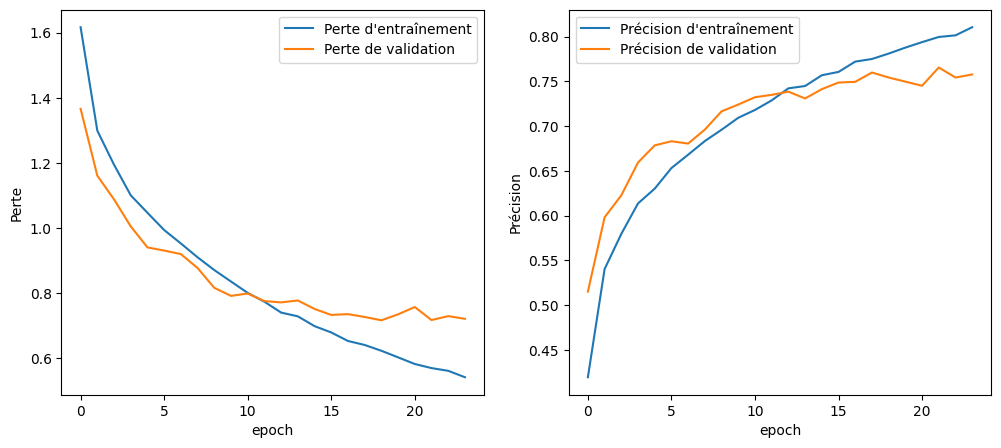

In [38]:
import matplotlib.pyplot as plt

# Affichage de la perte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Perte d'entraînement")
plt.plot(history.history['val_loss'], label="Perte de validation")
plt.xlabel("epoch")
plt.ylabel("Perte")
plt.legend()

# Affichage de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Précision d'entraînement")
plt.plot(history.history['val_accuracy'], label="Précision de validation")
plt.xlabel("epoch")
plt.ylabel("Précision")
plt.legend()

plt.show()

### Exemple de surapprentissage

![Overfitting CNN](overfit_cnn_tf.png)

#### Courbe de Perte
- **Perte d'entraînement** : La perte d'entraînement diminue de manière régulière au fil des epochs, ce qui est un bon signe indiquant que le modèle apprend bien les caractéristiques des données d'entraînement.
- **Perte de validation** : La courbe de validation, cependant, montre des oscillations et une tendance à augmenter légèrement. Cela peut indiquer que le modèle commence à surapprendre, car la perte de validation ne diminue pas de façon cohérente après quelques epochs.

#### Courbe de Précision
- **Précision d'entraînement** : La précision d’entraînement continue d’augmenter au fil des epochs, atteignant une très haute valeur proche de 0,998, ce qui indique que le modèle s’ajuste bien aux données d'entraînement.
- **Précision de validation** : La précision de validation oscille et semble légèrement diminuer vers la fin. Cette tendance, combinée avec la perte de validation, suggère un début de surapprentissage (overfitting).

**Conclusion** : Le premier ensemble de courbes indique que le modèle pourrait être en train de surapprendre. Vous pourriez envisager de réduire le nombre d'epochs ou d'utiliser une technique de régularisation comme `Dropout` pour améliorer la généralisation.

---

### Exemple de bonne généralisation

![Généralisation CNN](good_cnn_tf.png)

#### Courbe de Perte
- **Perte d'entraînement** : La perte d’entraînement diminue rapidement dans les premières epochs et continue de baisser légèrement par la suite.
- **Perte de validation** : La perte de validation diminue également de manière cohérente, sans oscillations majeures, ce qui indique que le modèle généralise bien sur les données de validation.

#### Courbe de Précision
- **Précision d'entraînement** : La précision d'entraînement augmente au fil des epochs, mais semble plafonner autour de 0,98, ce qui est un bon signe, car le modèle n'atteint pas des valeurs extrêmes.
- **Précision de validation** : La précision de validation reste légèrement plus élevée que la précision d'entraînement, indiquant une bonne généralisation.

**Conclusion** : Le deuxième ensemble de courbes montre un meilleur équilibre entre l’entraînement et la validation. Le modèle semble bien généraliser, sans signes de surapprentissage importants. Cela pourrait être dû à une meilleure configuration, comme l'utilisation de `EarlyStopping` ou d'autres techniques de régularisation.

---

### Recommandations Générales

1. **Surapprentissage dans le premier ensemble** : Si les oscillations persistent dans la validation (comme dans le premier ensemble), vous pourriez :
   - Ajouter une couche de `Dropout` pour éviter le surapprentissage.
   - Utiliser un callback `EarlyStopping` avec un `patience` plus faible pour arrêter l’entraînement dès que la perte de validation commence à augmenter.
   - Réduire le nombre d'epochs si le modèle commence à surapprendre après quelques epochs.

2. **Bonne généralisation dans le second ensemble** : Dans le second ensemble, les résultats sont très satisfaisants avec une bonne convergence des courbes de perte et de précision. Si les performances sont suffisantes, vous pouvez conserver cette configuration.

3. **Affiner les Hyperparamètres** : Pour obtenir des performances optimales, vous pourriez ajuster :
   - Le taux d'apprentissage.
   - La taille des couches convolutives et denses.
   - Les techniques de régularisation.

En résumé, le second modèle semble mieux équilibré et montre une meilleure généralisation. Le premier modèle, en revanche, présente des signes de surapprentissage, ce qui pourrait être amélioré avec des ajustements mineurs.

# A vous de jouer

L'évaluation du modèle consiste à mesurer les performances sur un ensemble de données de test qui n'a pas été vu par le modèle pendant l'entraînement. Cela permet d'estimer la capacité du modèle à généraliser sur de nouvelles données.

Voici les étapes et le code pour évaluer un modèle entraîné dans Keras, avec des explications sur les métriques de performance à utiliser et comment interpréter les résultats.

### 1. Évaluation de Base avec la Méthode `evaluate`

La méthode `evaluate` dans Keras permet d'obtenir la perte et les métriques (comme la précision) pour l'ensemble de test. 

```python
# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Perte sur l’ensemble de test : {test_loss:.4f}')
print(f'Précision sur l’ensemble de test : {test_accuracy * 100:.2f}%')
```

#### Explications

- **`x_test` et `y_test`** : Ce sont les données de test et leurs étiquettes.
- **Retourne** : La fonction retourne deux valeurs :
  - **`test_loss`** : La perte sur l'ensemble de test, qui mesure l'erreur entre les prédictions du modèle et les vraies valeurs.
  - **`test_accuracy`** : La précision sur l'ensemble de test, indiquant la proportion de prédictions correctes.
- **Interprétation** : Une perte faible et une précision élevée sur l'ensemble de test indiquent que le modèle généralise bien. Si la précision sur l'ensemble de test est significativement inférieure à celle sur l'ensemble de validation, cela peut indiquer un surapprentissage.

---

### 2. Générer des Prédictions et Analyser les Résultats

Pour une analyse plus approfondie, vous pouvez examiner les prédictions individuelles et afficher les erreurs de classification.

```python
# Génération des prédictions pour l'ensemble de test
y_pred = model.predict(x_test)

# Conversion des prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Si y_test est en one-hot encoding, sinon utilisez y_test directement
```

#### Explications

- **`y_pred`** : La sortie brute des prédictions sous forme de probabilités pour chaque classe.
- **`y_pred_classes`** : Conversion en classes prédites en prenant l'indice de la probabilité la plus élevée.
- **`y_true`** : Les vraies classes de `y_test`, après conversion si elles sont en one-hot encoding.

---

### 3. Calculer des Métriques Complémentaires

Pour un aperçu plus complet des performances, en particulier sur des classes déséquilibrées, vous pouvez calculer des métriques supplémentaires comme la **matrice de confusion**, la **précision**, le **rappel** et le **score F1**.

```python
from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_true, y_pred_classes)
print("Rapport de classification :")
print(class_report)
```

#### Explications

- **Matrice de Confusion** : Indique combien de fois chaque classe a été confondue avec d'autres classes. Elle est utile pour identifier les classes où le modèle a du mal.
- **Rapport de Classification** : Fournit la précision, le rappel et le score F1 pour chaque classe. Ces métriques sont particulièrement utiles pour les données déséquilibrées :
  - **Précision** : Proportion de vraies prédictions positives parmi toutes les prédictions positives.
  - **Rappel** : Proportion de vraies prédictions positives parmi toutes les vraies positives.
  - **Score F1** : Moyenne harmonique entre la précision et le rappel, utile pour un équilibre entre ces deux métriques.

---

### 4. Visualiser les Erreurs de Classification (Optionnel)

Pour mieux comprendre les erreurs, vous pouvez visualiser quelques exemples mal classés.

```python
import matplotlib.pyplot as plt

# Identifier les indices des exemples mal classés
errors = np.where(y_pred_classes != y_true)[0]

# Afficher quelques erreurs
plt.figure(figsize=(12, 10))
for i, idx in enumerate(errors[:9]):  # Afficher les 9 premières erreurs
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")
    plt.title(f"Vrai : {y_true[idx]}, Prédit : {y_pred_classes[idx]}")
    plt.axis("off")
plt.show()
```

#### Explications

- **Identification des erreurs** : `np.where(y_pred_classes != y_true)[0]` renvoie les indices des exemples où les prédictions sont incorrectes.
- **Affichage des erreurs** : La visualisation de quelques exemples permet de comprendre pourquoi le modèle pourrait avoir des difficultés avec certaines classes. Cela peut aussi mettre en lumière des images ambiguës ou des classes similaires.

---

### Interprétation des Résultats d'Évaluation

- **Perte et Précision sur l’Ensemble de Test** : Si la précision de test est similaire à celle de validation, cela indique que le modèle généralise bien. Si elle est nettement inférieure, il peut y avoir un problème de surapprentissage.
- **Matrice de Confusion** : Une matrice de confusion déséquilibrée avec de nombreux faux positifs ou faux négatifs pour certaines classes indique des classes difficiles à distinguer pour le modèle.
- **Rapport de Classification** : La précision, le rappel et le score F1 sont utiles pour évaluer les performances pour chaque classe. Un faible rappel ou une faible précision pour certaines classes peut indiquer la nécessité d'un meilleur équilibrage des données ou d'un modèle plus complexe.

---

### Exemple Complet pour l'Évaluation

Voici un exemple complet intégrant les différentes étapes d’évaluation :

```python
# Évaluation de la perte et de la précision
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Perte sur l’ensemble de test : {test_loss:.4f}')
print(f'Précision sur l’ensemble de test : {test_accuracy * 100:.2f}%')

# Prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matrice de confusion et rapport de classification
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Matrice de confusion :")
print(conf_matrix)

class_report = classification_report(y_true, y_pred_classes)
print("Rapport de classification :")
print(class_report)

# Visualisation des erreurs de classification
errors = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(12, 10))
for i, idx in enumerate(errors[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")
    plt.title(f"Vrai : {y_true[idx]}, Prédit : {y_pred_classes[idx]}")
    plt.axis("off")
plt.show()
```

En suivant ces étapes, vous obtenez une évaluation complète des performances de votre modèle CNN, à la fois avec des métriques globales et des analyses détaillées pour chaque classe. Ces informations vous aideront à comprendre où et comment améliorer le modèle si nécessaire.

In [37]:
#A vous de jouer

# Exercice

Créez et optimisez un modèle de CNN pour prédire les classes d'images en utilisant les données de votre choix parmi ceux d'Image Classification dans les datasets de TensorFlow : https://www.tensorflow.org/datasets/catalog/beans?hl=fr